In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

directory = 'participant_data'

# Load board configuration from JSON
board_config = {
    "scoring_left": 85,
    "scoring_top": 176,
    "scoring_width": 1341,
    "scoring_height": 150
}

scoring_left = board_config['scoring_left']
scoring_top = board_config['scoring_top']
scoring_width = board_config['scoring_width']
scoring_height = board_config['scoring_height']


In [3]:
dfs = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(directory, filename))
        dfs.append(df)

# Merge all subject data while ensuring correct structure
df_all = pd.concat(dfs, ignore_index=True)



# Verify merged data
df_all["subject_id"].unique() 

/var/folders/76/g6ys7mkj75zg7zyn8m093rk40000gn/T/ipykernel_31113/2699684375.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(dfs, ignore_index=True)


array(['AN', 'AE', 'EH'], dtype=object)

In [4]:
df_all

,x,y,feedback_block,subject_id
0,510.049601,454.986935,1,AN
1,561.854351,527.921285,1,AE
2,49.120264,51.924993,1,AE
3,-93.024452,165.828911,1,AE
4,512.507898,530.921285,1,AE
...,...,...,...,...
202,11.886226,-54.033017,12,AE
203,390.678694,442.993648,1,EH
204,670.630765,586.996906,1,AE
205,235.065011,233.990012,1,AE


In [5]:
feedback_blocks_series = df_all['feedback_block']

feedback_blocks = {
    'trajectory': [4, 5, 6],
    'endpos': [7, 8, 9],
    'rl': [10, 11, 12],
    "no feedback": [1, 2, 3]  # Normal feedback type
}

feedback_types = pd.unique(feedback_blocks_series)


feedback_mapping = {}
for feedback_type, block_numbers in feedback_blocks.items():
    for block in block_numbers:
        feedback_mapping[block] = feedback_type        

feedback_mapping

{4: 'trajectory',
 5: 'trajectory',
 6: 'trajectory',
 7: 'endpos',
 8: 'endpos',
 9: 'endpos',
 10: 'rl',
 11: 'rl',
 12: 'rl',
 1: 'no feedback',
 2: 'no feedback',
 3: 'no feedback'}

In [6]:
# Apply the feedback mapping to the DataFrame
df_all['feedback_type'] = df_all['feedback_block'].map(feedback_mapping)
df_all

,x,y,feedback_block,subject_id,feedback_type
0,510.049601,454.986935,1,AN,no feedback
1,561.854351,527.921285,1,AE,no feedback
2,49.120264,51.924993,1,AE,no feedback
3,-93.024452,165.828911,1,AE,no feedback
4,512.507898,530.921285,1,AE,no feedback
...,...,...,...,...,...
202,11.886226,-54.033017,12,AE,rl
203,390.678694,442.993648,1,EH,no feedback
204,670.630765,586.996906,1,AE,no feedback
205,235.065011,233.990012,1,AE,no feedback


In [7]:
feedback_colors = {
    'trajectory': 'blue',
    'endpos': 'red',
    'rl': 'green',
    "no feedback": 'black'
}

block_mapping = {
    1: "Block 1 (unperturbed)",
    2: "Block 2 (perturbed)",
    3: "Block 3 (unperturbed)"
}

# Define colors (matching the reference image)
dark_green = np.array([0, 100, 0]) / 255.0
light_green = np.array([144, 238, 144]) / 255.0
dark_red = np.array([139, 0, 0]) / 255.0
light_red = np.array([255, 182, 193]) / 255.0


In [19]:
def generate_gradient_image(scoring_rect, start_color, end_color):
    """Generate a gradient effect over a rectangular region with full RGB interpolation."""
    width, height = scoring_rect["scoring_width"], scoring_rect["scoring_height"]

    # Normalize colors to the range [0,1]
    start_color = np.array(start_color) / 255.0
    end_color = np.array(end_color) / 255.0

    # Create linear interpolation for all three RGB channels
    x = np.linspace(0, 1, width)
    y = np.linspace(0, 1, height)
    X, Y = np.meshgrid(x, y)

    # Interpolate between start_color and end_color for each channel
    gradient_image = np.zeros((height, width, 3))
    for i in range(3):  # Loop over RGB channels
        gradient_image[:, :, i] = np.outer(np.ones(height), np.linspace(start_color[i], end_color[i], width))

    return gradient_image


/var/folders/76/g6ys7mkj75zg7zyn8m093rk40000gn/T/ipykernel_31113/307970213.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(dfs, ignore_index=True)  # Merge all subjects' data


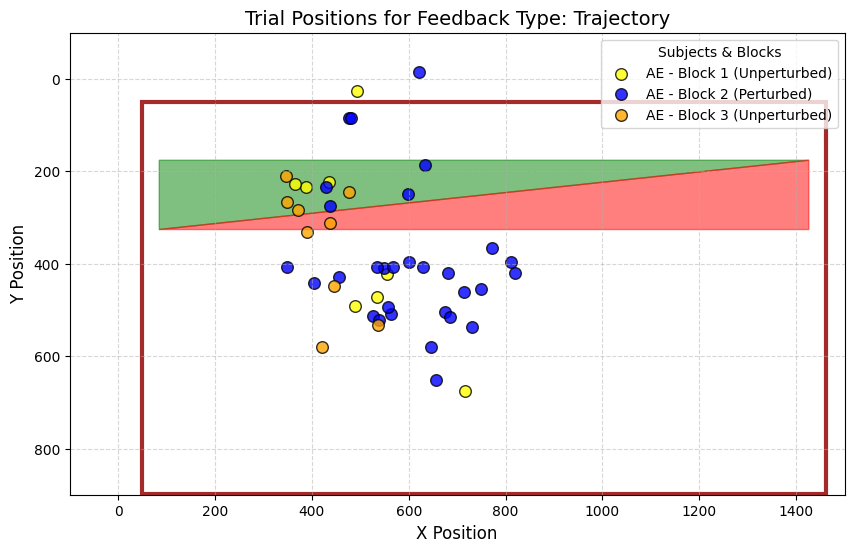

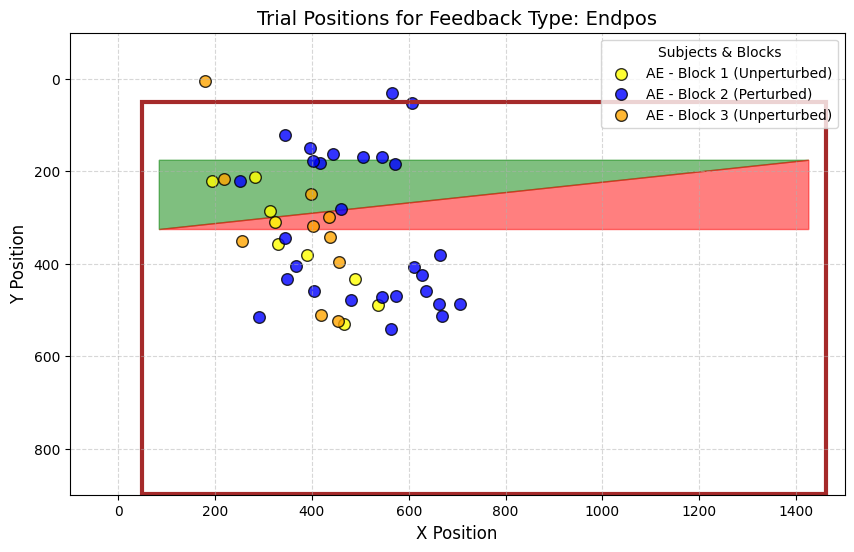

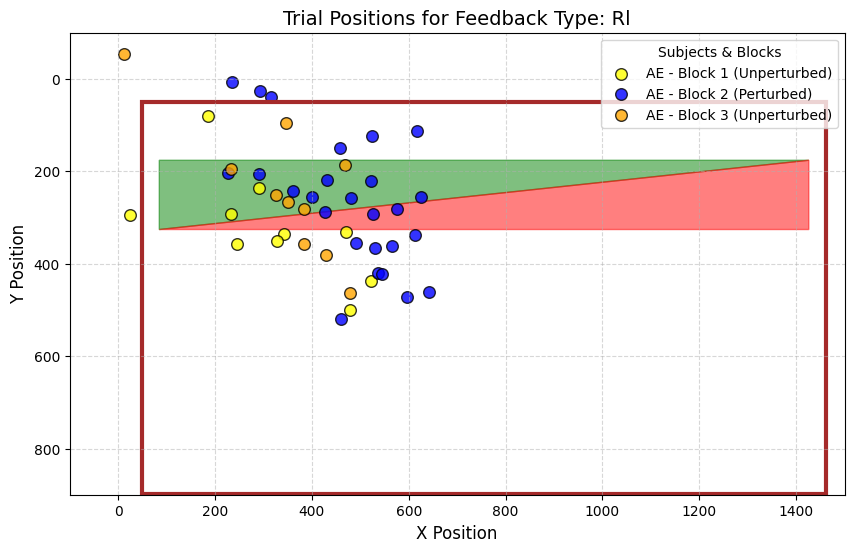

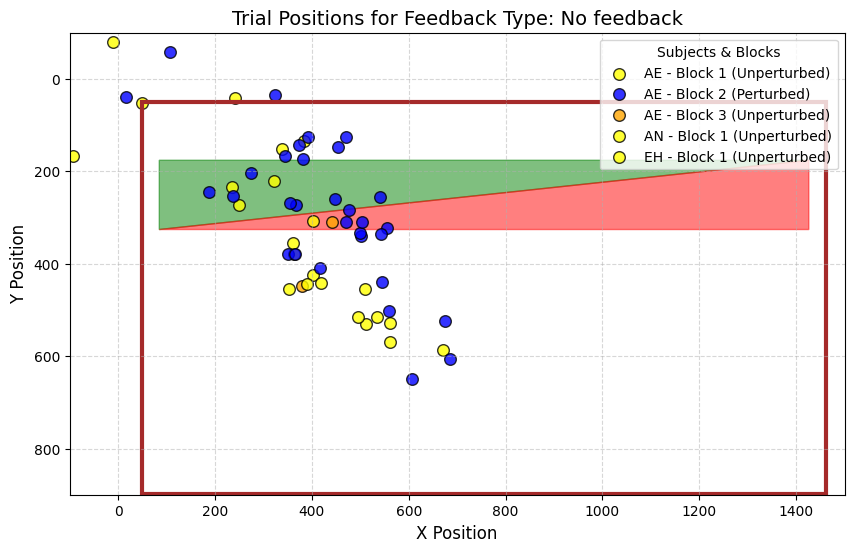

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

# Define feedback block mappings
feedback_blocks = {
    'trajectory': [4, 5, 6],
    'endpos': [7, 8, 9],
    'rl': [10, 11, 12],
    'no feedback': [1, 2, 3]  # Normal feedback type
}

# Define block labels for the legend
block_mapping = {
    1: "Block 1 (Unperturbed)",
    2: "Block 2 (Perturbed)",
    3: "Block 3 (Unperturbed)"
}

# Define colors for feedback types
feedback_colors = {
    'trajectory': 'blue',
    'endpos': 'red',
    'rl': 'green',
    'no feedback': 'black'
}

# Define block colors
block_colors = {1: 'yellow', 2: 'blue', 3: 'orange'}

# Load dataset
df_all = pd.concat(dfs, ignore_index=True)  # Merge all subjects' data

# Apply the feedback mapping
df_all['feedback_type'] = df_all['feedback_block'].map({
    block: feedback for feedback, blocks in feedback_blocks.items() for block in blocks
})

# Generate separate plots for each feedback type
for fb_type in feedback_blocks.keys():
    plt.figure(figsize=(10, 6))

    # Filter trials for the current feedback typy
    trials = df_all[df_all['feedback_type'] == fb_type].copy()
    if trials.empty:
        continue  # Skip if no data for this feedback type

    # Map feedback blocks into block levels (1, 2, 3)**
    trials['block_level'] = trials['feedback_block'].apply(lambda x: (x - 1) % 3 + 1)

    # Group by subject and block level**
    grouped_feedback_block = trials.groupby(['subject_id', 'block_level'])

    # Fix Reversed Green & Red Zones**
    green_polygon = patches.Polygon(
        [[85, 176], [85, 326], [1426, 176]], color="green", alpha=0.5  # Red is now on the LEFT
    )
    red_polygon = patches.Polygon(
        [[1426, 326], [1426, 176], [85, 326]], color="red", alpha=0.5  # Green is now on the RIGHT
    )

    plt.gca().add_patch(green_polygon)
    plt.gca().add_patch(red_polygon)

    # Plot each group (each subject & block level)**
    for (subject_id, block_level), group in grouped_feedback_block:
        plt.scatter(group['x'], group['y'],
                    label=f"{subject_id} - {block_mapping[block_level]}",
                    color=block_colors[block_level], 
                    alpha=0.8, edgecolors='black', s=70)  # Increase size & edge contrast

    # Use JSON's Table Rectangle to Draw the Exact Border
    plt.gca().add_patch(plt.Rectangle(
        (50, 49), 1412, 850,  # Exact values from JSON
        fill=False, edgecolor='brown', linewidth=3
    ))

    # Improve Labels & Titles
    plt.xlabel("X Position", fontsize=12)
    plt.ylabel("Y Position", fontsize=12)
    plt.title(f"Trial Positions for Feedback Type: {fb_type.capitalize()}", fontsize=14)

    # Legend Improvements
    plt.legend(title="Subjects & Blocks", loc="upper right", fontsize=10, frameon=True)

    # Fix Y-Axis Limits (Inverted)**
    plt.ylim(900, -100)  # Match original Pygame coordinate system
    plt.xlim(-100, 1500)
    plt.grid(True, linestyle="--", alpha=0.5) 

    #Show the final plot
    plt.show()
